# 1 basic function

In [26]:
%matplotlib inline


import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import scipy.ndimage as ndimage
from random import randint


def bytes_from_file(filename, chunksize=800):
    with open(filename, "rb") as f:
        while True:
            chunk = f.read(chunksize)
            if chunk:
                for b in chunk:
                    yield b
            else:
                break
    
def get_one_imagefrom_mnist():
    filename = "mnist-one-image";
    count = 0;
    image = []
    for b in bytes_from_file(filename):
        if(count<16):
            pass
        else:
            image.append(b)
        count+=1
    return image


# 2 distortion 

In [35]:
# https://bitbucket.org/zhuoqiang/alphadog/src/8167b895464bec57821d42a03dcbaba09c58a96f/1st_round/data.py?at=default&fileviewer=file-view-default
# order = 1 to make sure the image pixel is [0, 255]
def elastic_distort_image(image, scale=36, sigma=5, cval=0, order=1, truncate=4, random_state=np.random.RandomState(None)):
    from scipy.ndimage.filters import gaussian_filter
    from scipy.ndimage.interpolation import map_coordinates
    
    # https://gist.github.com/fmder/e28813c1e8721830ff9c
    deltas = tuple(gaussian_filter((random_state.rand(*image.shape)*2-1), sigma, mode="constant", cval=cval, truncate=truncate)*scale
                   for i in range(2))

    coordinates = np.meshgrid(*(np.arange(i) for i in image.shape))
    # first y, then x, so reverse with [::-1] trick
    indices = tuple(np.reshape(c+d, (-1, 1)) for c, d in zip(coordinates[::-1], deltas))
    
    return map_coordinates(image, indices, order=order, cval=cval, mode='constant').reshape(image.shape)


# 3 show image

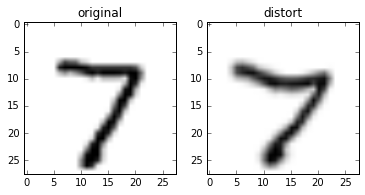

In [37]:
image_list = get_one_imagefrom_mnist()
image_array =np.asarray(image_list)
image =image_array.reshape(28, 28)

image_distort = elastic_distort_image(image)

plt.subplot(1, 2, 1) 
plt.title('original')
plt.imshow(image, cmap=cm.binary)

plt.subplot(1, 2, 2) 
plt.title('distort')
plt.imshow(image_distort, cmap=cm.binary)


# 4 make sure the image pixel is [0, 255]

In [38]:
image_distort

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  